## Trabajo Final
# Datos Obesidad
# Carga de Datos

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Cargamos los datos
df = pd.read_csv("../Datos/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Vista rápida de los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
# Descripción estadística de las variables numéricas
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [8]:
# Seleccionamos solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Verificamos las columnas seleccionadas
print(df_numeric.columns)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [9]:
# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  


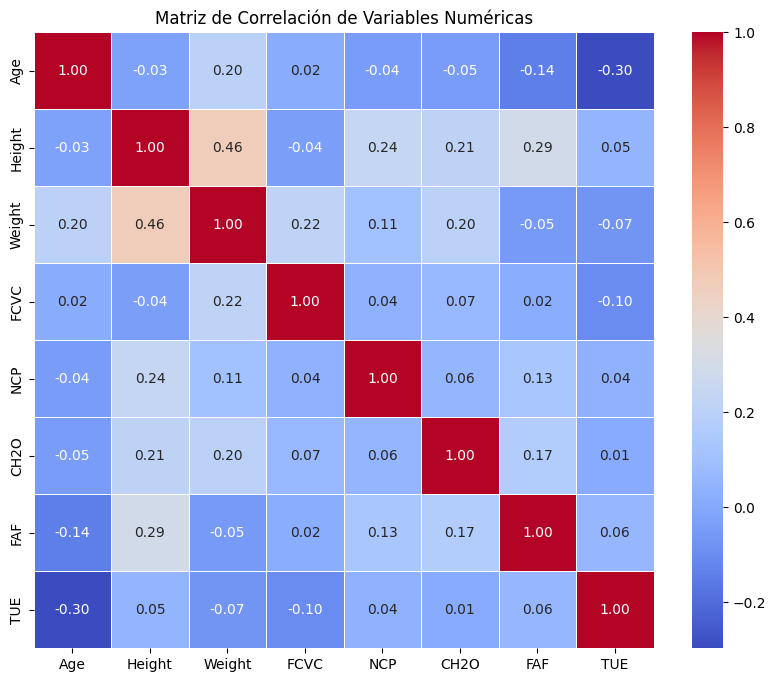

In [10]:
# Crear el heatmap
plt.figure(figsize=(10, 8))  # Define el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Títulos y etiquetas
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

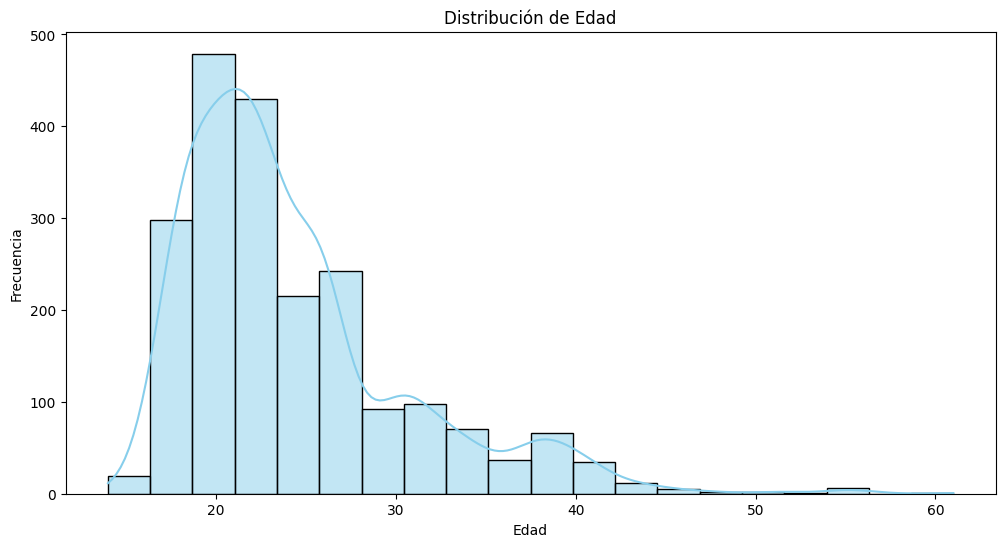

In [12]:
# Ejemplo de un histograma y KDE para una variable numérica
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

C:\Users\jjcampo\AppData\Local\Temp\ipykernel_11608\503661286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['NObeyesdad'], y=df['Age'], palette="Set2")


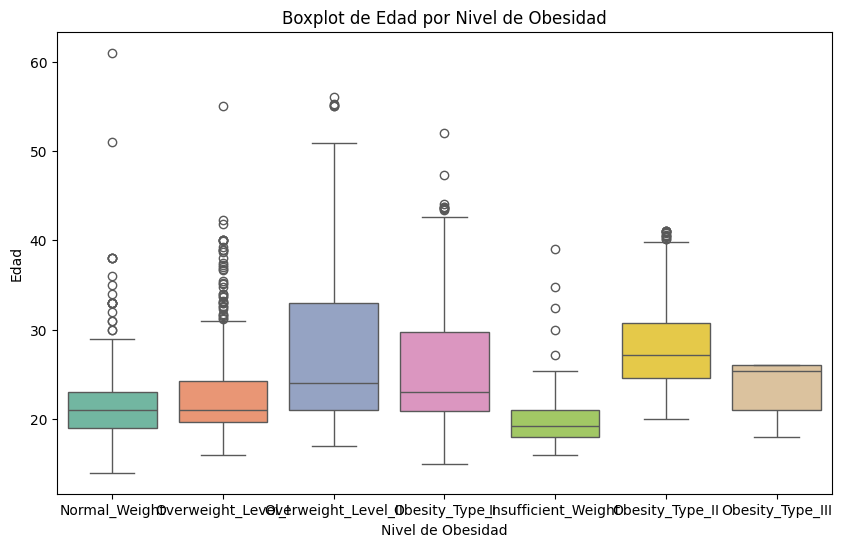

In [14]:
# Boxplot para visualizar la distribución de una variable numérica
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['NObeyesdad'], y=df['Age'], palette="Set2")
plt.title("Boxplot de Edad por Nivel de Obesidad")
plt.xlabel("Nivel de Obesidad")
plt.ylabel("Edad")
plt.show()

C:\Users\jjcampo\AppData\Local\Temp\ipykernel_11608\2872863901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='Set1')


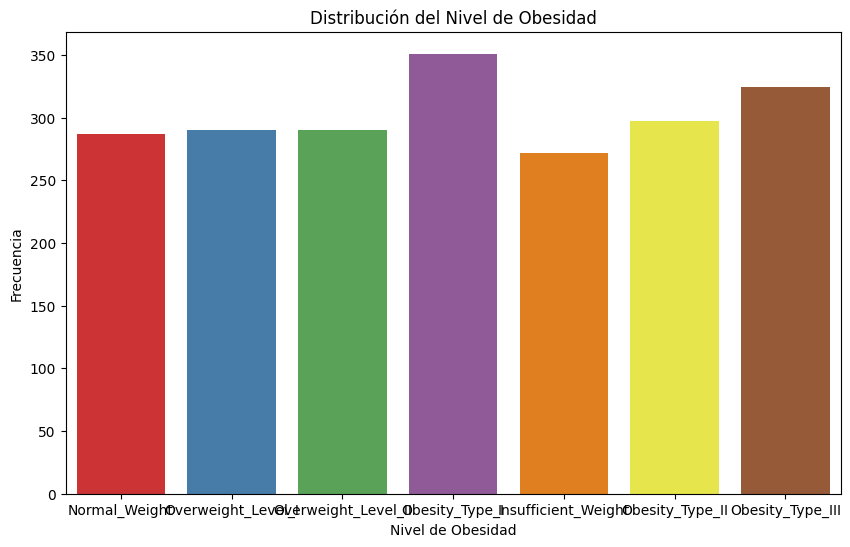

In [16]:
# Conteo de cada categoría (nivel de obesidad) en un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', palette='Set1')
plt.title("Distribución del Nivel de Obesidad")
plt.xlabel("Nivel de Obesidad")
plt.ylabel("Frecuencia")
plt.show()

KeyError: 'NObeyesdad'

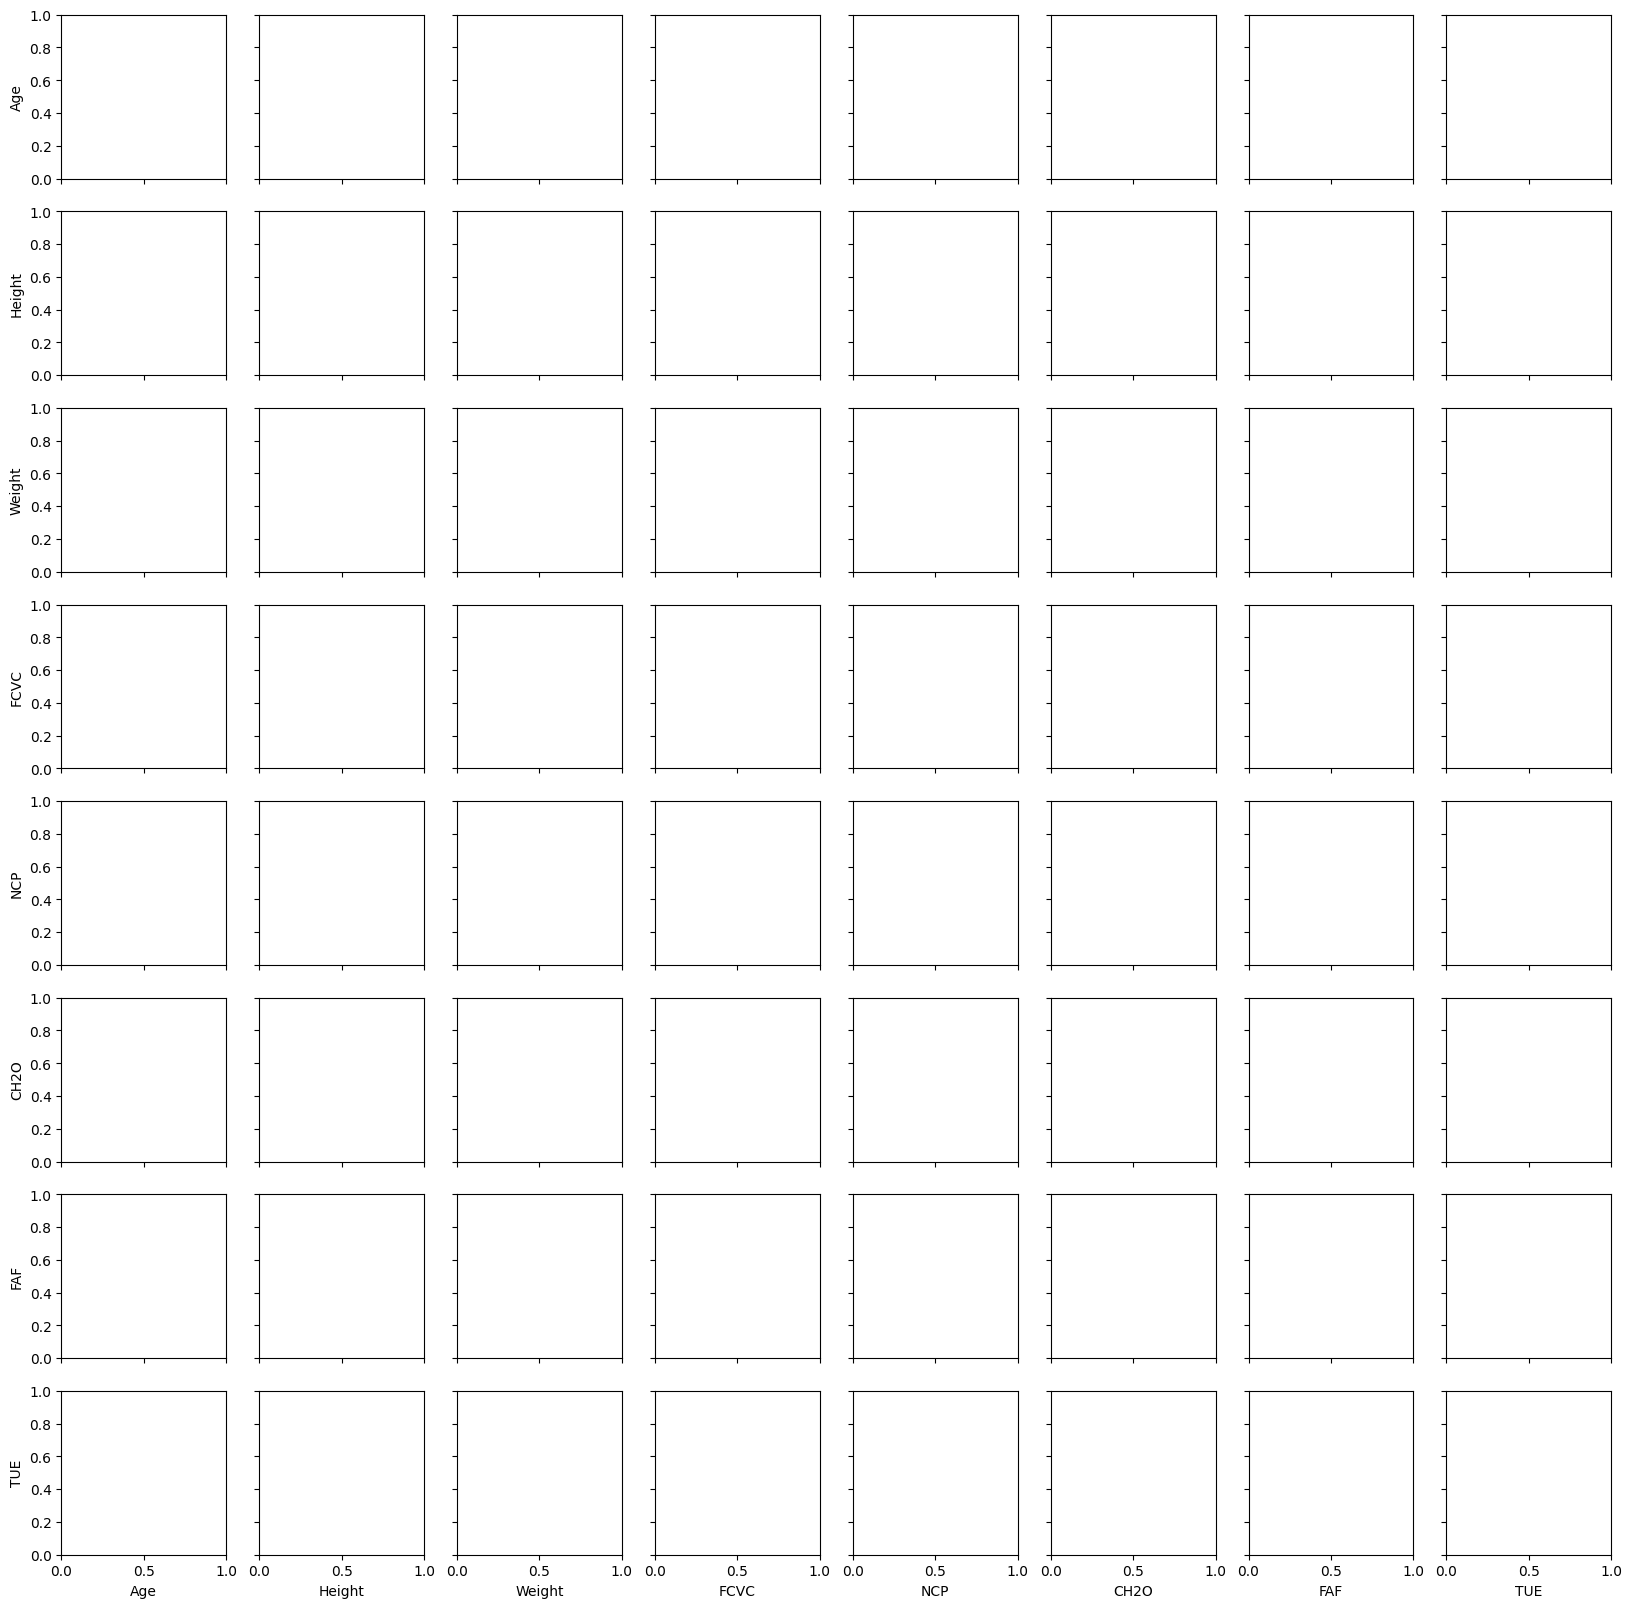

In [17]:
# Gráfico pairplot para observar relaciones entre varias variables numéricas
sns.pairplot(df_numeric, hue='NObeyesdad', palette='Set2')
plt.show()

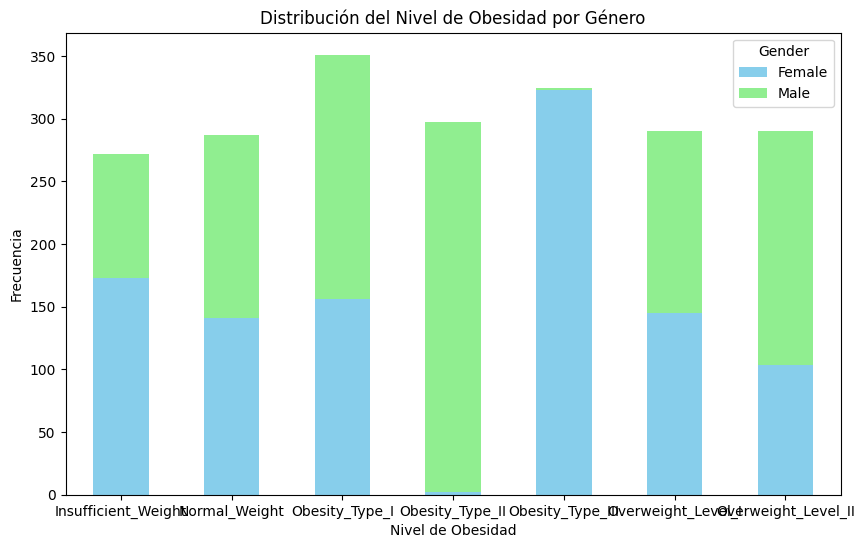

In [18]:
# Supongamos que quieres ver cómo se distribuyen los niveles de obesidad con respecto a alguna variable categórica, como 'sexo'
df_gender_obesity = pd.crosstab(df['NObeyesdad'], df['Gender'])

# Gráfico de barras apiladas
df_gender_obesity.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], figsize=(10, 6))
plt.title("Distribución del Nivel de Obesidad por Género")
plt.xlabel("Nivel de Obesidad")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()

C:\Users\jjcampo\AppData\Local\Temp\ipykernel_11608\3966495254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NObeyesdad', y='Age', data=df, palette='Set2')


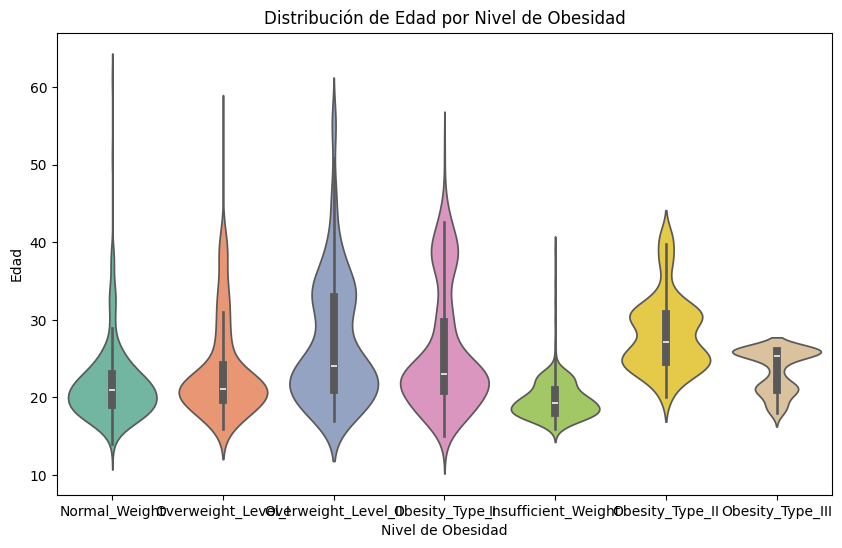

In [19]:
# Gráfico de violín para observar la distribución de una variable según el nivel de obesidad
plt.figure(figsize=(10, 6))
sns.violinplot(x='NObeyesdad', y='Age', data=df, palette='Set2')
plt.title("Distribución de Edad por Nivel de Obesidad")
plt.xlabel("Nivel de Obesidad")
plt.ylabel("Edad")
plt.show()

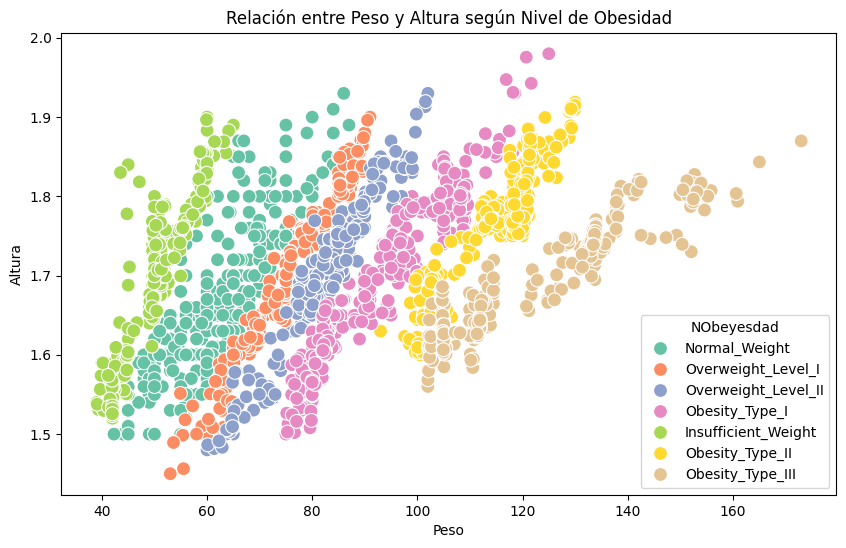

In [21]:
# Gráfico de dispersión para observar la relación entre dos variables numéricas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Height', hue='NObeyesdad', data=df, palette='Set2', s=100)
plt.title("Relación entre Peso y Altura según Nivel de Obesidad")
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estándarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)  # df_numeric solo contiene las variables numéricas

# Aplicar PCA
pca = PCA(n_components=0.95)  # 95% de la varianza explicada
X_pca = pca.fit_transform(X_scaled)

# Ver la cantidad de componentes y la varianza explicada
print(f"Componentes seleccionados: {pca.n_components_}")
print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")

Componentes seleccionados: 7
Varianza explicada por cada componente: [0.22648604 0.18657893 0.12645386 0.11886405 0.11757848 0.09672213
 0.08194625]


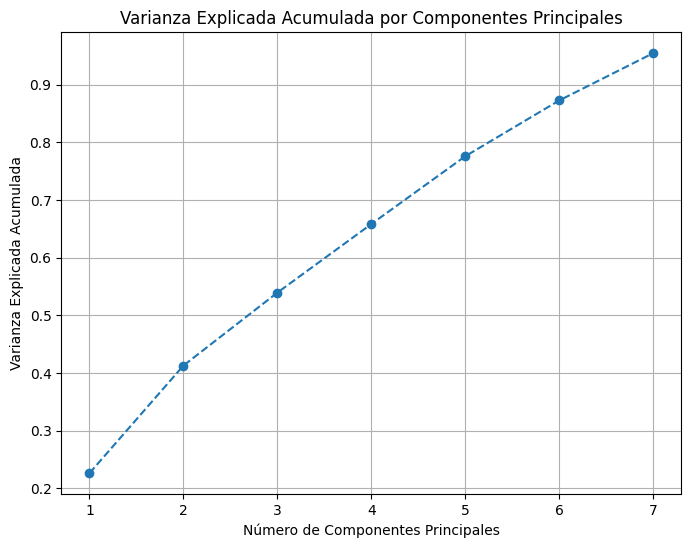

In [26]:
import numpy as np

# Graficar la varianza explicada acumulada por las componentes principales
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

Aunque estabamos buscando un 95% de varianza explicada y nos da con 7 componentes. Decidimos tomar los primeros 5 con una varianza explicada del 77.56%.

## Grafica del PCA

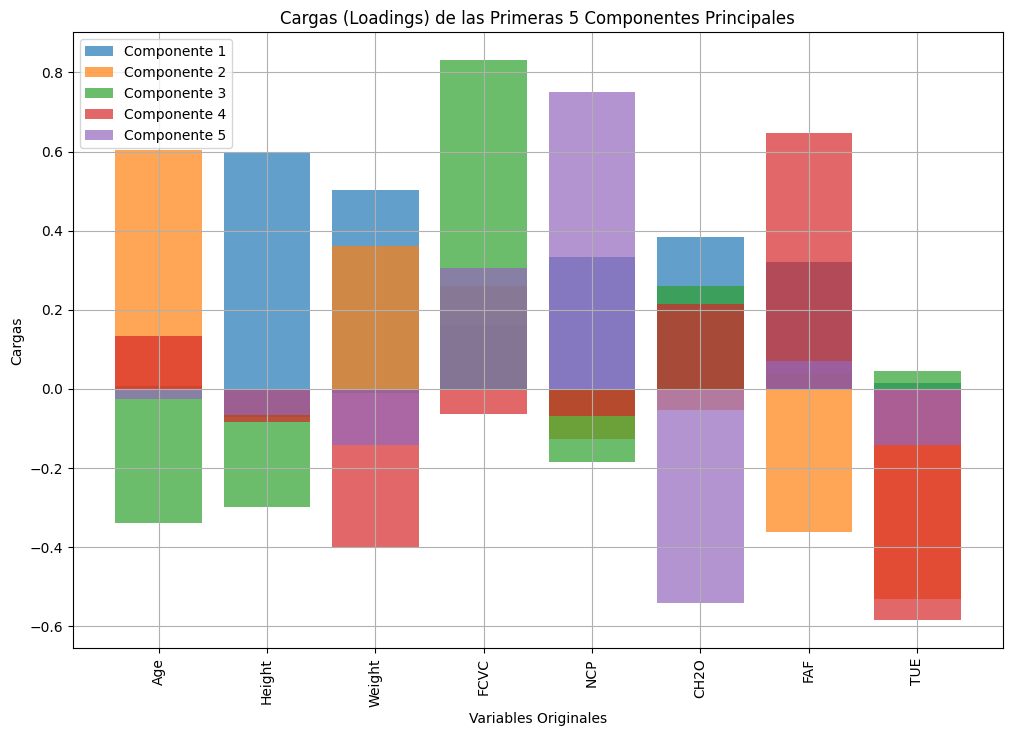

In [27]:
# Crear un gráfico de barras para las cargas de las primeras 5 componentes
loadings = pca.components_  # Cargas de cada componente

# Crear un DataFrame con las cargas
df_loadings = pd.DataFrame(loadings, columns=df_numeric.columns)

# Graficar las cargas para las primeras 5 componentes
plt.figure(figsize=(12, 8))
for i in range(5):  # Graficamos las primeras 5 componentes
    plt.bar(df_loadings.columns, df_loadings.iloc[i, :], alpha=0.7, label=f'Componente {i+1}')

plt.title('Cargas (Loadings) de las Primeras 5 Componentes Principales')
plt.xlabel('Variables Originales')
plt.ylabel('Cargas')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

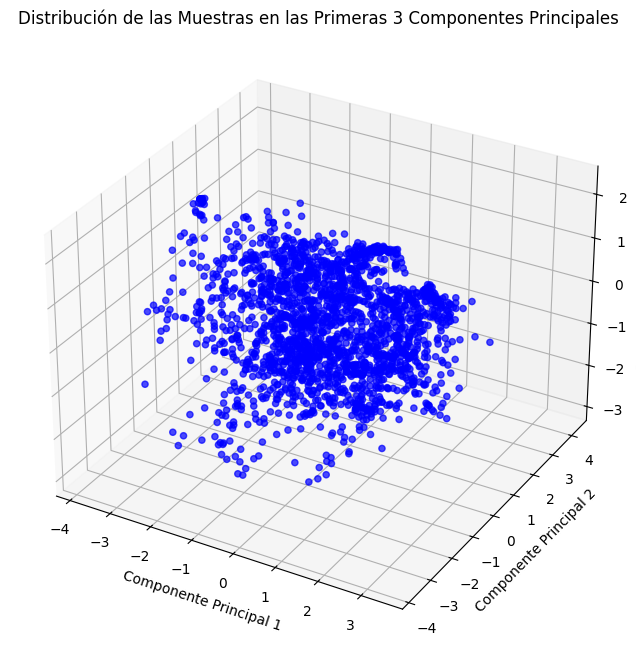

In [28]:
# Graficar las primeras tres componentes principales
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='b', alpha=0.7)
ax.set_title('Distribución de las Muestras en las Primeras 3 Componentes Principales')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

plt.show()

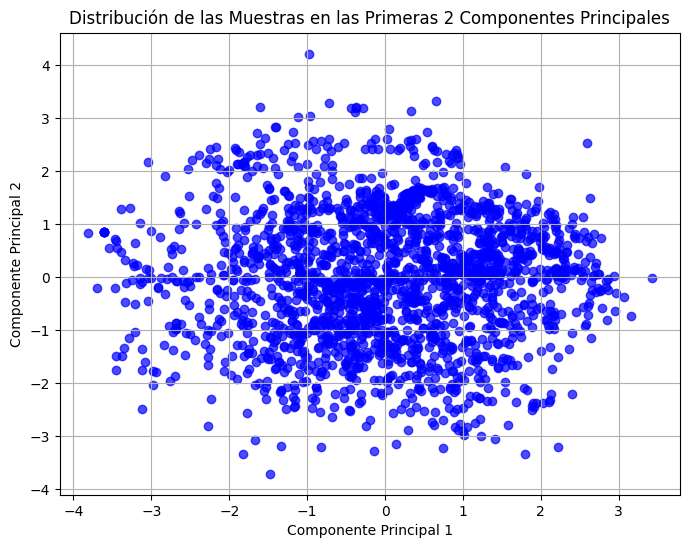

In [29]:
# Graficar las primeras dos componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color='b')
plt.title('Distribución de las Muestras en las Primeras 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['Normal_Weight', 'Normal_Weight', 'Normal_Weight', ...,
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III'],
      dtype=object)

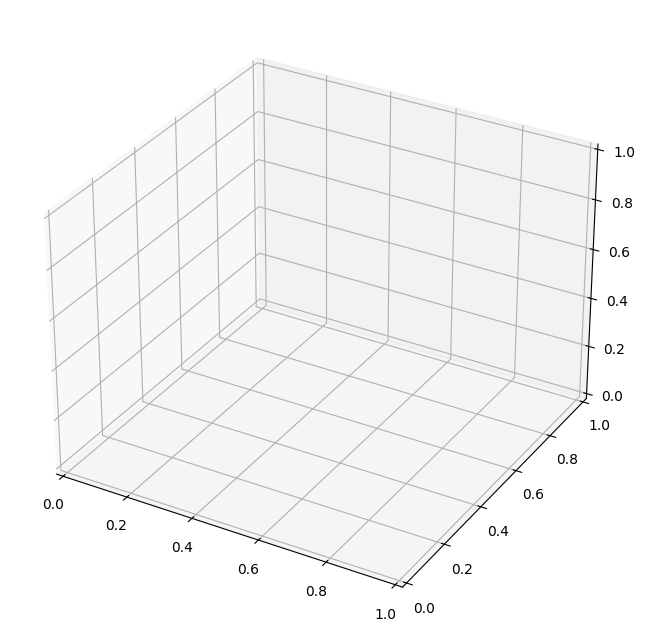

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Asegúrate de que `obesity_level` esté en el DataFrame
# Si ya tienes la variable `obesity_level` en df, puedes usarla para asignar colores.
y = df['NObeyesdad']  # Variable objetivo (nivel de obesidad)

# Crear un gráfico 3D con las primeras tres componentes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores a las muestras en función de `obesity_level`
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', alpha=0.7)

# Títulos y etiquetas
ax.set_title('Distribución de las Muestras en las Primeras 3 Componentes Principales')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Agregar barra de colores para mapear los niveles de obesidad
cbar = plt.colorbar(scatter)
cbar.set_label('Nivel de Obesidad')

plt.show()

## Cluster K-Mean

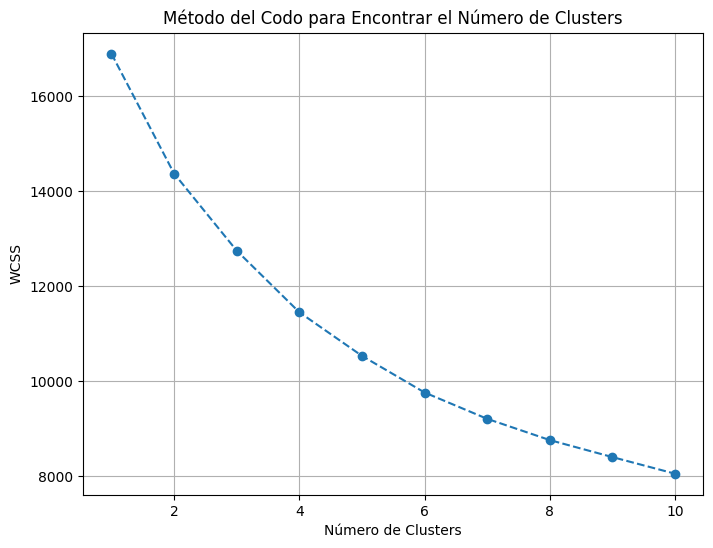

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determinar el número de clusters usando el método del codo
wcss = []  # Within-Cluster Sum of Squares (WCSS)
for i in range(1, 11):  # Probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo para elegir el número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para Encontrar el Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [32]:
# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)  # Predicciones de los clusters

# Agregar los clusters al DataFrame original (df)
df['Cluster'] = y_kmeans

PCA con el K-mean

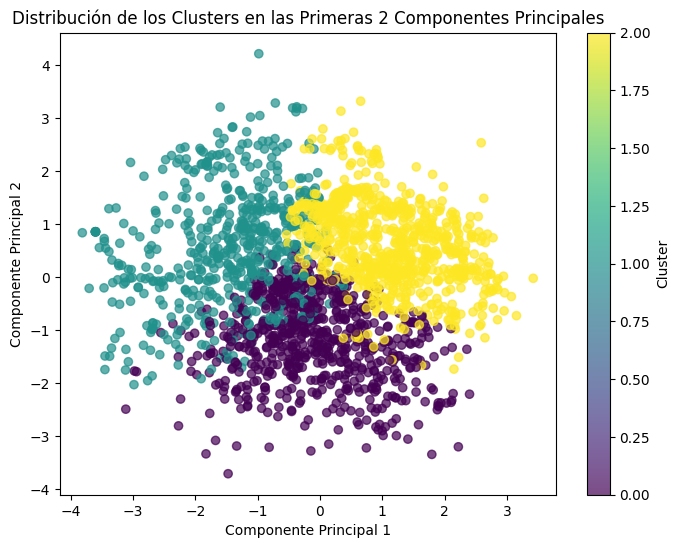

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Distribución de los Clusters en las Primeras 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

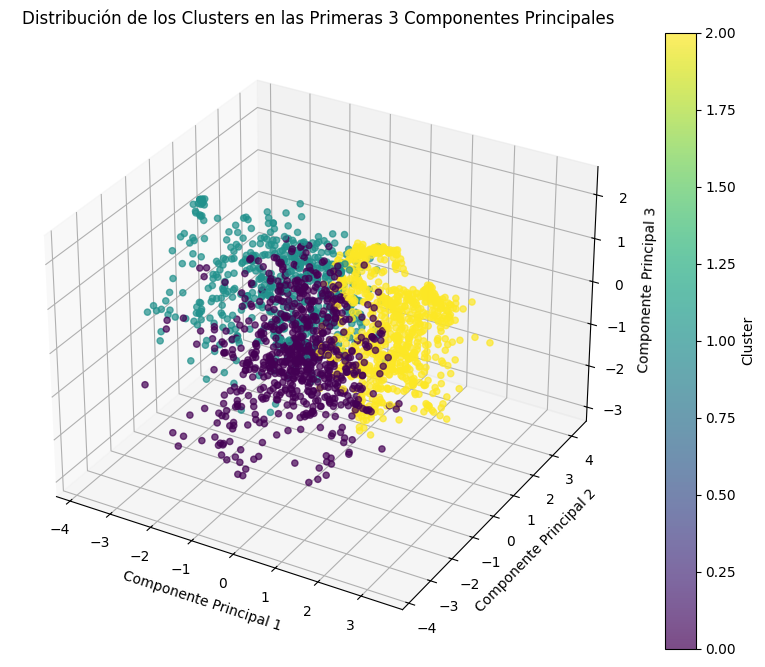

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# Gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los clusters
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['Cluster'], cmap='viridis', alpha=0.7)

# Títulos y etiquetas
ax.set_title('Distribución de los Clusters en las Primeras 3 Componentes Principales')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Barra de colores
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.show()

In [36]:
# Verificar cómo se distribuyen los clusters en función de 'obesity_level'
cluster_distribution = pd.crosstab(df['Cluster'], df['NObeyesdad'])
print(cluster_distribution)

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Cluster                                                          
0                           200            182              96   
1                            68             90             130   
2                             4             15             125   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Cluster                                                             
0                         2                 0                 133   
1                        53                25                 121   
2                       242               299                  36   

NObeyesdad  Overweight_Level_II  
Cluster                          
0                           113  
1                            85  
2                            92  


In [37]:
from sklearn.metrics import homogeneity_score, completeness_score

# Evaluación del clustering en relación con la variable 'obesity_level'
homogeneity = homogeneity_score(df['NObeyesdad'], df['Cluster'])
completeness = completeness_score(df['NObeyesdad'], df['Cluster'])

print(f"Homogeneidad: {homogeneity}")
print(f"Completitud: {completeness}")

Homogeneidad: 0.16357550574854712
Completitud: 0.2919578975929236
